In [23]:
import pandas as pd; pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt

## Reading the data file
credit_card = pd.read_excel('default of credit card clients.xls', skiprows = 1)
credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [28]:
## Splitting the data into train and test
train = credit_card.groupby('default payment next month', group_keys = False).apply(lambda x: x.sample(frac = 0.8))
test = credit_card[~np.isin(credit_card['ID'], train['ID'])]

## Dropping ID 
train = train.drop(columns = 'ID', axis = 1)
test = test.drop(columns = 'ID', axis = 1)

target = test['default payment next month']
test = test.drop(columns = 'default payment next month', axis = 1)

## Writing the data to csv 
train.to_csv('train.csv', index = False)
test.to_csv('test.csv', index = False)

In [29]:
train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29364,20000,1,1,2,22,-2,-2,-2,-2,-2,-2,-7,-7,730,1000,300,0,0,737,1060,300,0,0,0
27519,460000,1,2,1,52,0,0,0,0,0,0,177520,174746,168279,171579,163450,160547,8000,9000,8154,6000,6000,6000,0
3396,210000,2,1,2,43,1,-1,0,0,0,0,-3309,177952,167125,139784,142662,145725,184212,5482,3493,3590,3815,3876,0
28316,60000,2,2,2,27,0,-1,-1,0,0,0,7301,11482,39511,39654,38168,36526,11512,39511,1866,1400,2000,1300,0
14532,180000,2,2,1,43,-1,-1,-1,-1,-1,0,7823,9549,1968,1800,8198,511,9549,1968,1800,8198,0,844,0


In [30]:
test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
12,630000,2,2,2,41,-1,0,-1,-1,-1,-1,12137,6500,6500,6500,6500,2870,1000,6500,6500,6500,2870,0,0
13,70000,1,2,2,30,1,2,2,0,0,2,65802,67369,65701,66782,36137,36894,3200,0,3000,3000,1500,0,1
17,320000,1,1,1,49,0,0,0,-1,-1,-1,253286,246536,194663,70074,5856,195599,10358,10000,75940,20000,195599,50000,0
29,50000,1,1,2,26,0,0,0,0,0,0,15329,16575,17496,17907,18375,11400,1500,1500,1000,1000,1600,0,0
32,100000,1,1,2,32,0,0,0,0,0,0,93036,84071,82880,80958,78703,75589,3023,3511,3302,3204,3200,2504,0


In [34]:
test['default payment next month'].value_counts() / test.shape[0]

0    0.778833
1    0.221167
Name: default payment next month, dtype: float64

In [32]:
train.shape

(24000, 24)

In [33]:
credit_card.shape

(30000, 25)

In [27]:
np.isin(credit_card['ID'], train['ID'])

array([ True, False, False, ...,  True,  True,  True])

In [3]:
credit_card.shape

(30000, 25)

In [4]:
credit_card.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


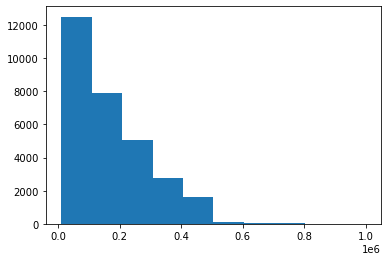

In [6]:
plt.hist(credit_card['LIMIT_BAL'])
plt.show()

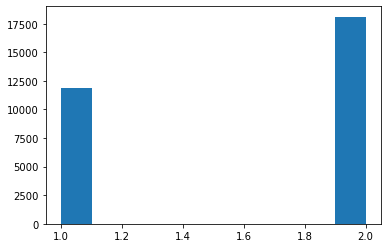

In [7]:
plt.hist(credit_card['SEX'])
plt.show()

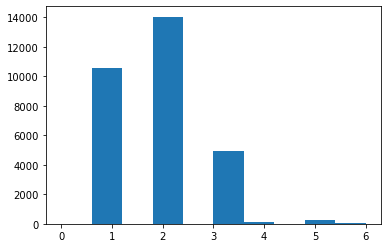

In [8]:
plt.hist(credit_card['EDUCATION'])
plt.show()

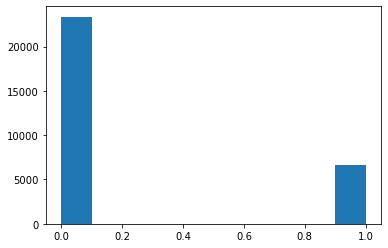

In [9]:
plt.hist(credit_card['default payment next month'])
plt.show()

In [10]:
credit_card['default payment next month'].value_counts() / credit_card.shape[0]

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [13]:
test = credit_card.groupby('default payment next month', group_keys = False).apply(lambda x: x.sample(frac = 0.8))
test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5025,5026,20000,1,2,2,27,0,0,-1,0,0,0,19331,18225,18418,19297,19000,19683,1209,19330,2303,1000,1000,1000,0
27602,27603,400000,2,1,2,29,-2,-2,-2,-2,-2,-2,7622,38849,13586,19502,3809,4512,39097,13653,19617,3930,7021,24987,0
11057,11058,500000,2,1,2,28,0,0,0,0,0,0,5392,6038,6972,7037,7603,10602,1502,1502,502,1003,10024,40060,0
12139,12140,120000,2,2,2,31,0,0,0,0,0,0,115573,117767,115918,116918,118698,121372,5700,4172,4168,4770,5119,2954,0
9240,9241,390000,2,1,2,29,-2,-2,-1,-1,-1,-1,0,0,1630,1871,2400,3480,0,1630,1871,2400,3480,1600,0


In [14]:
test['default payment next month'].value_counts() / test.shape[0]

0    0.778792
1    0.221208
Name: default payment next month, dtype: float64

In [16]:
credit_card['SEX'].value_counts() / credit_card.shape[0]

2    0.603733
1    0.396267
Name: SEX, dtype: float64

In [17]:
test['SEX'].value_counts() / test.shape[0]

2    0.601333
1    0.398667
Name: SEX, dtype: float64

In [18]:
credit_card['EDUCATION'].value_counts() / credit_card.shape[0]

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: EDUCATION, dtype: float64

In [19]:
test['EDUCATION'].value_counts() / test.shape[0]

2    0.466833
1    0.352583
3    0.164708
5    0.009500
4    0.004167
6    0.001792
0    0.000417
Name: EDUCATION, dtype: float64

In [20]:
credit_card['PAY_0'].value_counts() / credit_card.shape[0]

 0    0.491233
-1    0.189533
 1    0.122933
-2    0.091967
 2    0.088900
 3    0.010733
 4    0.002533
 5    0.000867
 8    0.000633
 6    0.000367
 7    0.000300
Name: PAY_0, dtype: float64

In [21]:
test['PAY_0'].value_counts() / test.shape[0]

 0    0.490583
-1    0.190583
 1    0.123833
-2    0.091542
 2    0.087417
 3    0.011083
 4    0.002542
 5    0.000958
 8    0.000708
 6    0.000458
 7    0.000292
Name: PAY_0, dtype: float64

In [22]:
credit_card['ID']

0            1
1            2
2            3
3            4
4            5
         ...  
29995    29996
29996    29997
29997    29998
29998    29999
29999    30000
Name: ID, Length: 30000, dtype: int64